# FAKE - JOB

## Aurreprozesamendua

In [58]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import re
from tqdm import tqdm
import time
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import pandas as pd
import numpy as np
import seaborn as sns # used for plot interactive graph. 
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from wordcloud import WordCloud

In [59]:
#Datuak path
datuak='./CSV/fake_job_postings.csv'
gorde='./CSV/'

In [60]:
#datuak kargatu
df_job=pd.read_csv(datuak)
df_job.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [61]:
df_job.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [62]:
df_job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [63]:
#Dataren dimentsioa
print("Data dims is: ",df_job.shape)

Data dims is:  (17880, 18)


Number of real (label as 0) and fake jobs (label as 1) in the dataset :
0    17014
1      866
Name: fraudulent, dtype: int64


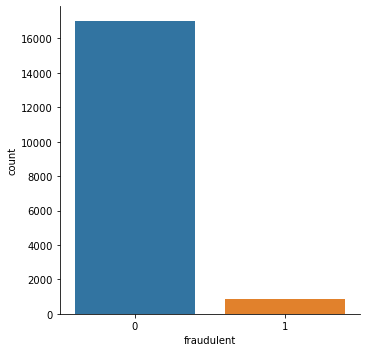

In [64]:
# num of fake jobs in the Dataset
print("Number of real (label as 0) and fake jobs (label as 1) in the dataset :")


print(df_job["fraudulent"].value_counts())
sb.catplot(x="fraudulent", data = df_job, kind = "count")

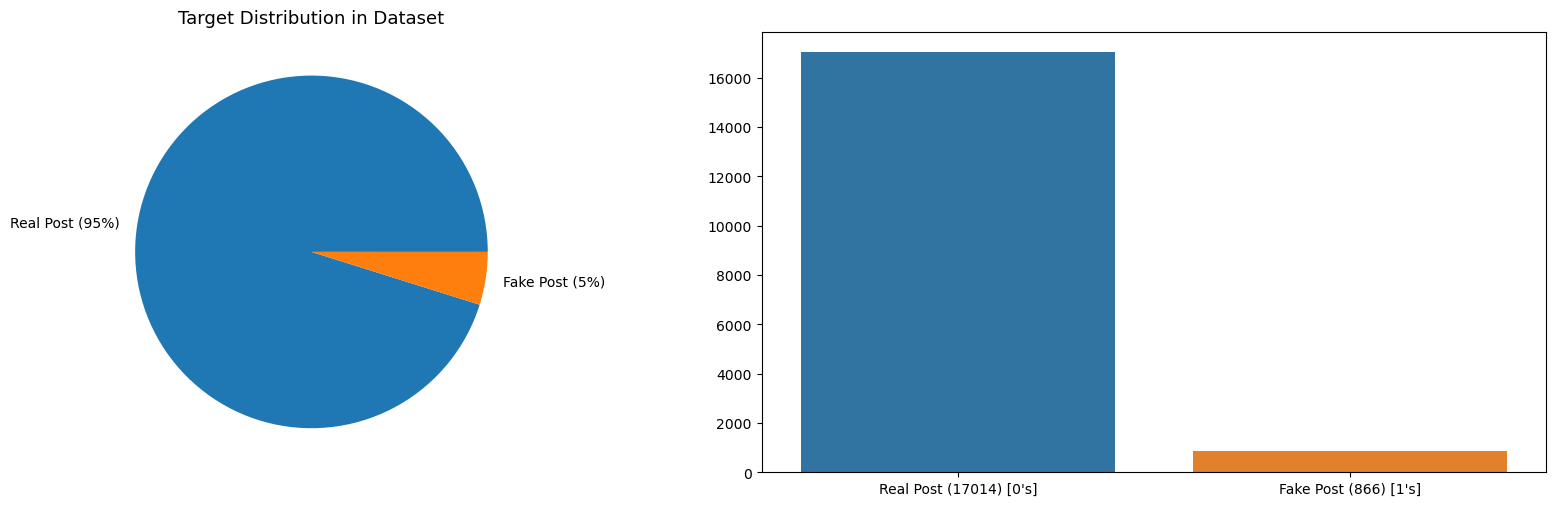

In [65]:
fig, axes = plt.subplots(ncols=2, figsize=(17, 5), dpi=100)
plt.tight_layout()

df_job["fraudulent"].value_counts().plot(kind='pie', ax=axes[0], labels=['Real Post (95%)', 'Fake Post (5%)'])
temp = df_job["fraudulent"].value_counts()
sb.barplot(temp.index,temp, ax=axes[1])

axes[0].set_ylabel(' ')
axes[1].set_ylabel(' ')
axes[1].set_xticklabels(["Real Post (17014) [0's]", "Fake Post (866) [1's]"])

axes[0].set_title('Target Distribution in Dataset', fontsize=13)

plt.show()

In [66]:
'''Konkatenatu zutabe guztiak atributu bakar bat lortzeko '''

text = df_job[df_job.columns[1:-1]].apply(lambda x: ','.join(x.dropna().astype(str)),axis=1)
target = df_job['fraudulent']

print(len(text))
print(len(target))

17880
17880


In [67]:
'''Post eta klasea duen dataframe-a sortu'''

text=df = pd.DataFrame(text,columns=['post'])
text['Fraudulent']=target
print(text)

'''Gorde'''
text.to_csv(gorde+'textMiningFakeJob.csv')

                                                    post  Fraudulent
0      Marketing Intern,US, NY, New York,Marketing,We...           0
1      Customer Service - Cloud Video Production,NZ, ...           0
2      Commissioning Machinery Assistant (CMA),US, IA...           0
3      Account Executive - Washington DC,US, DC, Wash...           0
4      Bill Review Manager,US, FL, Fort Worth,SpotSou...           0
...                                                  ...         ...
17875  Account Director - Distribution ,CA, ON, Toron...           0
17876  Payroll Accountant,US, PA, Philadelphia,Accoun...           0
17877  Project Cost Control Staff Engineer - Cost Con...           0
17878  Graphic Designer,NG, LA, Lagos,Nemsia Studios ...           0
17879  Web Application Developers,NZ, N, Wellington,E...           0

[17880 rows x 2 columns]


In [68]:
def clean_text(text):
    ''' remove text in square brackets,remove links,remove punctuation.'''
    text=text.replace(",", " ")
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
   # text = re.sub('[^a-zA-Z]', ' ', text) 
    
    return text


# Applying the cleaning function
text['post'] = [clean_text(i) for i in text['post'] ] 

print(text)

                                                    post  Fraudulent
0      Marketing Intern US  NY  New York Marketing We...           0
1      Customer Service  Cloud Video Production NZ   ...           0
2      Commissioning Machinery Assistant CMA US  IA  ...           0
3      Account Executive  Washington DC US  DC  Washi...           0
4      Bill Review Manager US  FL  Fort Worth SpotSou...           0
...                                                  ...         ...
17875  Account Director  Distribution  CA  ON  Toront...           0
17876  Payroll Accountant US  PA  Philadelphia Accoun...           0
17877  Project Cost Control Staff Engineer  Cost Cont...           0
17878  Graphic Designer NG  LA  Lagos Nemsia Studios ...           0
17879  Web Application Developers NZ  N  Wellington E...           0

[17880 rows x 2 columns]


In [69]:
#TOKENIZE
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')

# appling tokenizer5
text['post'] = text['post'].apply(lambda x: tokenizer.tokenize(x))
text.head(5)

,post,Fraudulent
0,"[Marketing, Intern, US, NY, New, York, Marketi...",0
1,"[Customer, Service, Cloud, Video, Production, ...",0
2,"[Commissioning, Machinery, Assistant, CMA, US,...",0
3,"[Account, Executive, Washington, DC, US, DC, W...",0
4,"[Bill, Review, Manager, US, FL, Fort, Worth, S...",0


In [70]:
#STOPWORDS
stop_words = stopwords.words('english')
def remove_stopwords(text):
    """
    Removing stopwords belonging to english language
    
    """
    words = [w for w in text if w not in stop_words]
    words = map(lambda word: word.lower(), words)
    return list(words)


text['post'] = text['post'].apply(lambda x : remove_stopwords(x))

print(text)

                                                    post  Fraudulent
0      [marketing, intern, us, ny, new, york, marketi...           0
1      [customer, service, cloud, video, production, ...           0
2      [commissioning, machinery, assistant, cma, us,...           0
3      [account, executive, washington, dc, us, dc, w...           0
4      [bill, review, manager, us, fl, fort, worth, s...           0
...                                                  ...         ...
17875  [account, director, distribution, ca, on, toro...           0
17876  [payroll, accountant, us, pa, philadelphia, ac...           0
17877  [project, cost, control, staff, engineer, cost...           0
17878  [graphic, designer, ng, la, lagos, nemsia, stu...           0
17879  [web, application, developers, nz, n, wellingt...           0

[17880 rows x 2 columns]


In [71]:
#LEMATIZATION
nltk.download('wordnet')
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in text]

#df = pd.DataFrame(['this was cheesy', 'she likes these books', 'wow this is great'], columns=['text'])
text['post'] = text.post.apply(lemmatize_text)

[nltk_data] Downloading package wordnet to /home/maialen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [72]:
print(text)

                                                    post  Fraudulent
0      [marketing, intern, u, ny, new, york, marketin...           0
1      [customer, service, cloud, video, production, ...           0
2      [commissioning, machinery, assistant, cma, u, ...           0
3      [account, executive, washington, dc, u, dc, wa...           0
4      [bill, review, manager, u, fl, fort, worth, sp...           0
...                                                  ...         ...
17875  [account, director, distribution, ca, on, toro...           0
17876  [payroll, accountant, u, pa, philadelphia, acc...           0
17877  [project, cost, control, staff, engineer, cost...           0
17878  [graphic, designer, ng, la, lagos, nemsia, stu...           0
17879  [web, application, developer, nz, n, wellingto...           0

[17880 rows x 2 columns]


In [73]:
def combine_text(list_of_text):
    combined_text = ' '.join(list_of_text)
    return combined_text

text['post'] = text['post'].apply(lambda x : combine_text(x))
text.head(5)


,post,Fraudulent
0,marketing intern u ny new york marketing were ...,0
1,customer service cloud video production nz auc...,0
2,commissioning machinery assistant cma u ia wev...,0
3,account executive washington dc u dc washingto...,0
4,bill review manager u fl fort worth spotsource...,0


In [74]:
df=text
print(text)

                                                    post  Fraudulent
0      marketing intern u ny new york marketing were ...           0
1      customer service cloud video production nz auc...           0
2      commissioning machinery assistant cma u ia wev...           0
3      account executive washington dc u dc washingto...           0
4      bill review manager u fl fort worth spotsource...           0
...                                                  ...         ...
17875  account director distribution ca on toronto sa...           0
17876  payroll accountant u pa philadelphia accountin...           0
17877  project cost control staff engineer cost contr...           0
17878  graphic designer ng la lagos nemsia studio loo...           0
17879  web application developer nz n wellington engi...           0

[17880 rows x 2 columns]


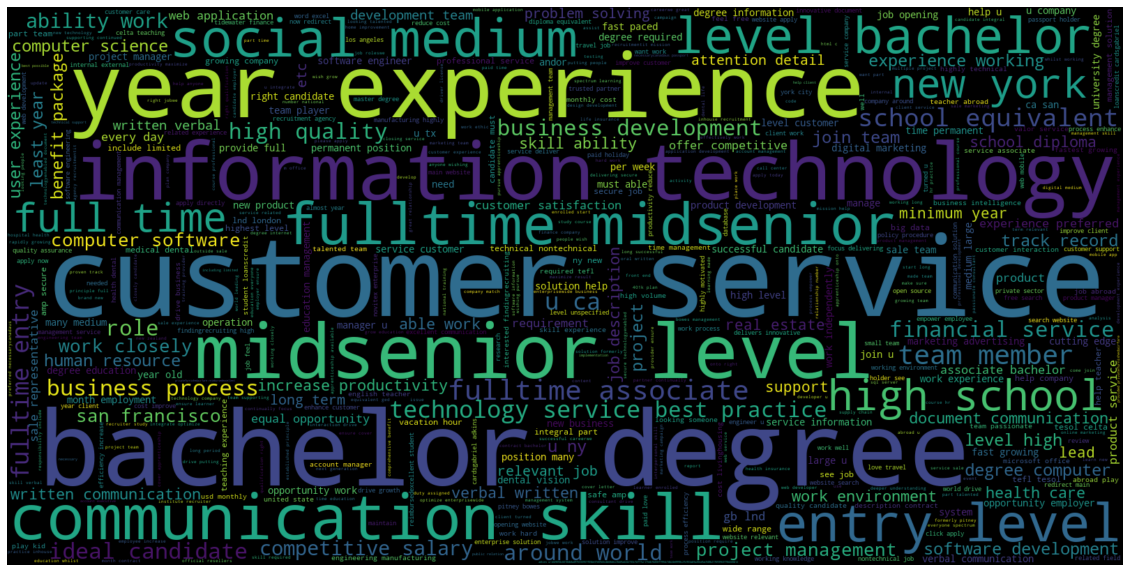

In [75]:
#True post WordCloud (fraudulent = 0)
plt.figure(figsize = (20,20)) 
wc = WordCloud(width = 1600 , height = 800 , max_words = 3000).generate(" ".join(df[df.Fraudulent == 0].post))
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.show()

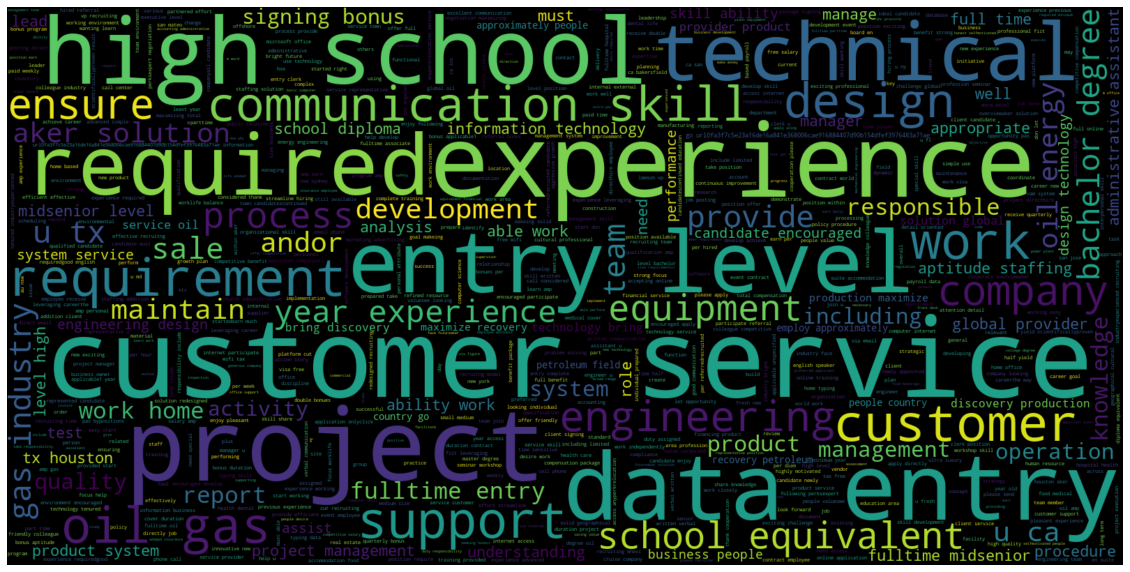

In [76]:
#Fake post WordCloud (fraudulent=1)
plt.figure(figsize = (20,20)) 
wc = WordCloud(width = 1600 , height = 800 , max_words = 3000).generate(" ".join(df[df.Fraudulent == 1].post))
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [77]:
#gorde aurreprozesamendua
df.to_csv (gorde+'preprocess.csv', index = False, header=True)